In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, IndexLocator
import numpy as np

In [35]:
df = pd.read_csv("2022_schedule.csv")
df

,date,time,home,away
0,2022-04-29,19:30:00,LA,NC
1,2022-04-30,15:00:00,POR,KC
2,2022-04-30,19:00:00,CHI,LOU
3,2022-05-01,17:00:00,WAS,RGN
4,2022-05-01,18:00:00,HOU,SD
...,...,...,...,...
132,2022-10-16,16:00:00,HOU,KC
133,2022-10-16,19:00:00,SD,CHI
134,2022-10-23,14:00:00,POR,SD
135,2022-10-23,16:30:00,RGN,KC


In [36]:
df["date"] = pd.to_datetime(df["date"])
df["time"] = pd.to_datetime(df["time"])

# Get day of week
df["day_of_week"] = (df["date"].dt.dayofweek + 1) % 7

# Get hour of day
df["hour_of_day"] = df["time"].dt.hour

# Add empty column
df["empty"] = 0
df

,date,time,home,away,day_of_week,hour_of_day,empty
0,2022-04-29,2023-01-08 19:30:00,LA,NC,5,19,0
1,2022-04-30,2023-01-08 15:00:00,POR,KC,6,15,0
2,2022-04-30,2023-01-08 19:00:00,CHI,LOU,6,19,0
3,2022-05-01,2023-01-08 17:00:00,WAS,RGN,0,17,0
4,2022-05-01,2023-01-08 18:00:00,HOU,SD,0,18,0
...,...,...,...,...,...,...,...
132,2022-10-16,2023-01-08 16:00:00,HOU,KC,0,16,0
133,2022-10-16,2023-01-08 19:00:00,SD,CHI,0,19,0
134,2022-10-23,2023-01-08 14:00:00,POR,SD,0,14,0
135,2022-10-23,2023-01-08 16:30:00,RGN,KC,0,16,0


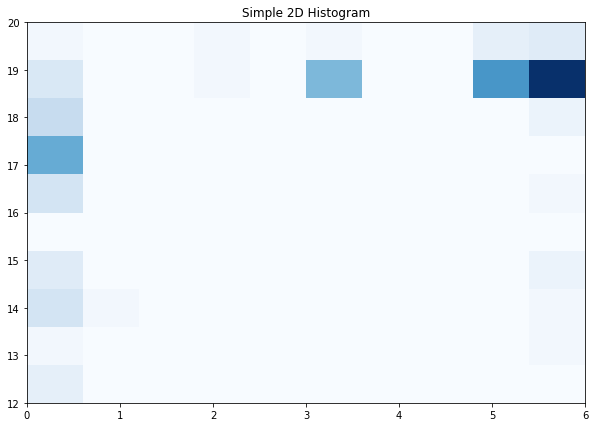

In [37]:
fig = plt.subplots(figsize =(10, 7))
# Creating plot
plt.hist2d(df["day_of_week"], df["hour_of_day"], cmap=plt.get_cmap("Blues"))
plt.title("Simple 2D Histogram")
  
# Show plot
plt.show()

<Figure size 720x36 with 0 Axes>

<Figure size 12000x600 with 0 Axes>

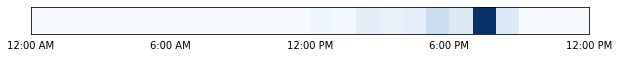

In [47]:
plt.clf()
plt.rcParams["figure.figsize"] = (10, 0.5)
plt.figure(dpi=1200)
fig, ax = plt.subplots()

# Creating plot
plt.hist2d(
    df["hour_of_day"],
    df["empty"],
    cmap=plt.get_cmap("Blues"),
    range=[[0, 24], [0, 1]],
    bins=[24, 1],
)

# Ticks
ax.tick_params(bottom=False, left=False)
ax.set_yticks([])
hours = ["12:00 AM", "6:00 AM", "12:00 PM", "6:00 PM", "12:00 PM"]
ax.xaxis.set_major_formatter(FuncFormatter(lambda self, i: hours[i]))
ax.set_xticks([0, 6, 12, 18, 24])

# Show plot
plt.show()